## **Projek Capstone Image Klasifikasi Buah Dan Sayur Fresh or Rotten**

## **Import Semua Packages/Library yang Digunakan**

### Import Library

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.applications.resnet50 import preprocess_input, ResNet50
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set_theme(style="ticks")

## **Data Preparation**

### Dwonload Data

In [ ]:
# upload token kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadprastya23","key":"8d6dfc862cfa07ebdda3b4bc549efc2b"}'}

In [ ]:
# Set Up Kaggle Credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dwonload data
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 2.84G/2.84G [00:37<00:00, 149MB/s]
100% 2.84G/2.84G [00:37<00:00, 81.8MB/s]


In [ ]:
# unzip data
!unzip fresh-and-stale-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_5372.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_54.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6186.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6285.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6551.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6565.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_6985.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7306.jpg  
  inflating: dataset/Train/rottencapsicum/WhatsApp 

### Data Preprocessing

#### Data Loading

In [ ]:
import os

# Path ke dataset
base_path = 'dataset'

# Fungsi untuk hitung jumlah gambar per subfolder
def count_images(folder):
    total = 0
    for root, dirs, files in os.walk(folder):
        total += len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return total

# Hitung jumlah gambar
train_count = count_images(os.path.join(base_path, 'Train'))
test_count = count_images(os.path.join(base_path, 'Test'))

print(f'Jumlah gambar di folder Train: {train_count}')
print(f'Jumlah gambar di folder Test: {test_count}')

Jumlah gambar di folder Train: 23619
Jumlah gambar di folder Test: 6738


In [ ]:
import os
from PIL import Image
import pandas as pd

# Path ke folder Train
train_dir = 'dataset/Train'

# Simpan path gambar dan label ke dalam list
data = []

for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            filepath = os.path.join(label_path, file)
            data.append({'filepath': filepath, 'label': label})

# Buat DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head(18)

,filepath,label
0,dataset/Train/freshoranges/Screen Shot 2018-06...,freshoranges
1,dataset/Train/freshoranges/Screen Shot 2018-06...,freshoranges
2,dataset/Train/freshoranges/rotated_by_15_Scree...,freshoranges
3,dataset/Train/freshoranges/rotated_by_45_Scree...,freshoranges
4,dataset/Train/freshoranges/rotated_by_45_Scree...,freshoranges
5,dataset/Train/freshoranges/vertical_flip_Scree...,freshoranges
6,dataset/Train/freshoranges/vertical_flip_Scree...,freshoranges
7,dataset/Train/freshoranges/rotated_by_30_Scree...,freshoranges
8,dataset/Train/freshoranges/rotated_by_60_Scree...,freshoranges
9,dataset/Train/freshoranges/vertical_flip_Scree...,freshoranges


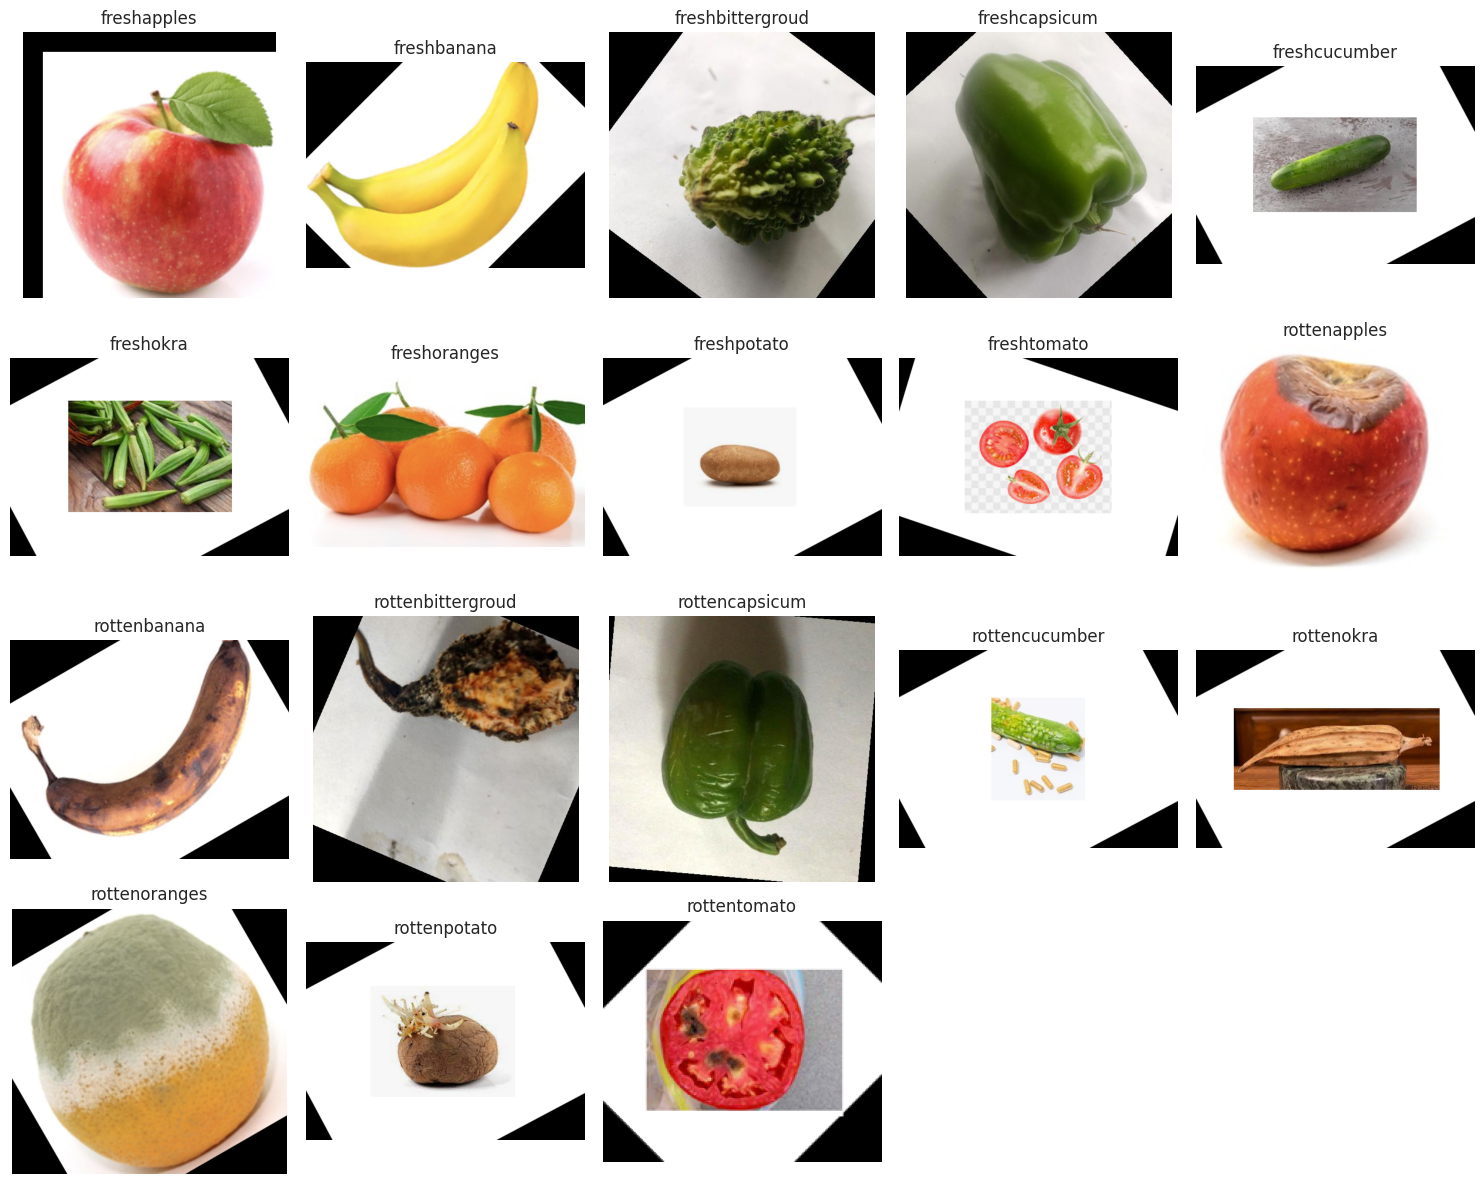

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Ambil satu sample per kelas
sample_per_class = df.groupby('label').first().reset_index()

# Tentukan ukuran grid otomatis
n_classes = len(sample_per_class)
cols = 5
rows = (n_classes + cols - 1) // cols

plt.figure(figsize=(15, rows * 3))
for i, row in sample_per_class.iterrows():
    img = Image.open(row['filepath'])
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(row['label'])
    plt.axis('off')
plt.tight_layout()
plt.show()

### EDA

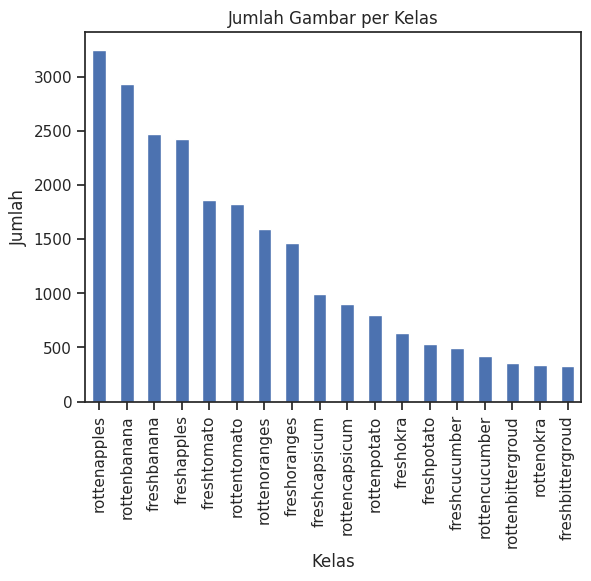

In [ ]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', title='Jumlah Gambar per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


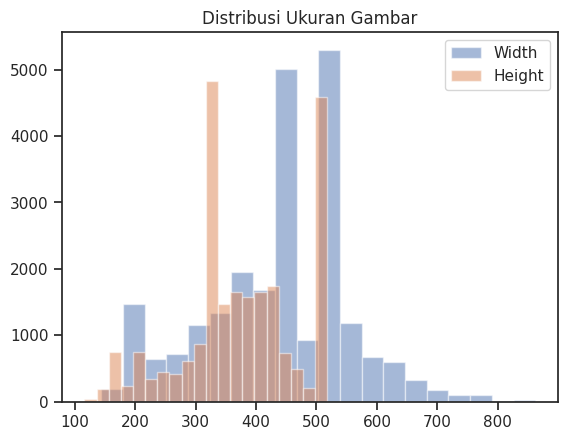

In [ ]:
from tqdm import tqdm

def get_image_size(path):
    try:
        with Image.open(path) as img:
            return img.size
    except:
        return (0, 0)  # Error handling jika gambar corrupt

df['image_size'] = df['filepath'].apply(get_image_size)
df['width'] = df['image_size'].apply(lambda x: x[0])
df['height'] = df['image_size'].apply(lambda x: x[1])

plt.hist(df['width'], bins=20, alpha=0.5, label='Width')
plt.hist(df['height'], bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title('Distribusi Ukuran Gambar')
plt.show()


### Split Dataset

Data dibagi menjadi tiga bagian utama:
- 64% untuk data pelatihan (training set)

- 16% untuk data validasi (validation set)

- 20% untuk data pengujian (test set)

In [ ]:
# Import and prepare the first split of datasets train and test
path = os.path.join("/content/dataset/Train")

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
dataset, test_dataset = keras.utils.image_dataset_from_directory(directory=path,
                                                                 image_size=(IMG_WIDTH, IMG_HEIGHT),
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="int",
                                                                 validation_split=0.2,
                                                                 subset="both",
                                                                 shuffle=True,
                                                                 seed=42)

# Get class names
class_names = dataset.class_names
print(class_names)

Found 23619 files belonging to 18 classes.
Using 18896 files for training.
Using 4723 files for validation.
['freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']


In [ ]:
# Split dataset in train and validation set
num_elements = len(dataset)
train_size = int(0.8 * num_elements)
val_dataset = dataset.skip(train_size).prefetch(tf.data.AUTOTUNE)
train_dataset = dataset.take(train_size).prefetch(tf.data.AUTOTUNE)

# Check length
len(train_dataset), len(val_dataset), len(test_dataset)

(472, 119, 148)

In [ ]:
# Check format
for image_batch, labels_batch in train_dataset.take(1):
  print(f"Train data: {image_batch.shape}")
  print(f"Train labels: {labels_batch.shape}")

for image_batch, labels_batch in val_dataset.take(1):
  print(f"Validation data: {image_batch.shape}")
  print(f"Validation labels: {labels_batch.shape}")

for image_batch, labels_batch in test_dataset.take(1):
  print(f"Test data: {image_batch.shape}")
  print(f"Test labels: {labels_batch.shape}")

Train data: (32, 224, 224, 3)
Train labels: (32,)
Validation data: (32, 224, 224, 3)
Validation labels: (32,)
Test data: (32, 224, 224, 3)
Test labels: (32,)


In [ ]:
# Check pixel intesities
for image, label in train_dataset.take(1):
  print(tf.reduce_max(image))
  print(tf.reduce_min(image))

tf.Tensor(255.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


### Data Augmentation

In [ ]:
# Set up data augmentation layers
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.4)
    ])

## **Modelling**

### *Callback*

In [ ]:
# Create a lab-book to track the different experiments
lab_book = {}

# Create early stopping callback
early_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True,
                                         monitor="val_accuracy", min_delta=0.005)

### **Model CNN**

In [ ]:
# Lab book name entry
name = "Model"

# Build model
tf.random.set_seed(42)
model = keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(filters=8, kernel_size=(5,5),
                  padding="same", activation="relu",
                  kernel_initializer="he_normal"),
    layers.MaxPool2D(),
    layers.Conv2D(filters=16, kernel_size=(3,3),
                  padding="same", activation="relu",
                  kernel_initializer="he_normal"),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=(3,3),
                  padding="same", activation="relu",
                  kernel_initializer="he_normal"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(18, activation="softmax")
    ], name=name)

model.summary()

# Compile model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history = model.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=[early_cb])

# Write lab-book
train_accuracy = model.evaluate(train_dataset)[1]
val_accuracy = model.evaluate(val_dataset)[1]
lab_book[name] = {"train_accuracy": train_accuracy, "val_accuracy": val_accuracy}

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 18)             │       451,602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 458,018 (1.75 MB)

 Trainable params: 458,018 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 79s 156ms/step - accuracy: 0.4800 - loss: 2.1752 - val_accuracy: 0.7919 - val_loss: 0.6091
Epoch 2/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 79s 158ms/step - accuracy: 0.8002 - loss: 0.5696 - val_accuracy: 0.8333 - val_loss: 0.4716
Epoch 3/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - accuracy: 0.8414 - loss: 0.4453 - val_accuracy: 0.8310 - val_loss: 0.4738
Epoch 4/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.8562 - loss: 0.3948 - val_accuracy: 0.8639 - val_loss: 0.3975
Epoch 5/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 76s 162ms/step - accuracy: 0.8803 - loss: 0.3341 - val_accuracy: 0.8739 - val_loss: 0.3603
Epoch 6/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step - accuracy: 0.8863 - loss: 0.3210 - val_accuracy: 0.8792 - val_loss: 0.3444
Epoch 7/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.9021 - loss: 0.2693 - val_accuracy: 0.8866 - val_loss: 0.3336
Epoch 8/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 75s 158ms/step - accuracy: 0.8965 -

In [ ]:
# Simpan seluruh model (struktur + bobot)
model.save('model_cnn.h5')

model.save('model_cnn.keras')

In [ ]:
# Simpan ke file .pkl
import pickle

with open('cnn_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

## **Visualisasi Hasil Prediksi**

### Visualisasi Data Testing model

In [ ]:
# Prediksi pada data testing
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Ambil daftar unik kelas yang berhasil diprediksi
unique_classes = np.unique(y_pred_classes)

# Mapping index ke nama kelas
class_names2 = test_dataset.class_names

# Buat DataFrame hasilnya
import pandas as pd

df_hasil = pd.DataFrame({
    "Index Kelas": unique_classes,
    "Nama Kelas": [class_names[i] for i in unique_classes]
})

# Tampilkan
print(f"Jumlah kelas yang berhasil diprediksi: {len(unique_classes)}")
print(df_hasil)

148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step
Jumlah kelas yang berhasil diprediksi: 18
    Index Kelas         Nama Kelas
0             0        freshapples
1             1        freshbanana
2             2   freshbittergroud
3             3      freshcapsicum
4             4      freshcucumber
5             5          freshokra
6             6       freshoranges
7             7        freshpotato
8             8        freshtomato
9             9       rottenapples
10           10       rottenbanana
11           11  rottenbittergroud
12           12     rottencapsicum
13           13     rottencucumber
14           14         rottenokra
15           15      rottenoranges
16           16       rottenpotato
17           17       rottentomato


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


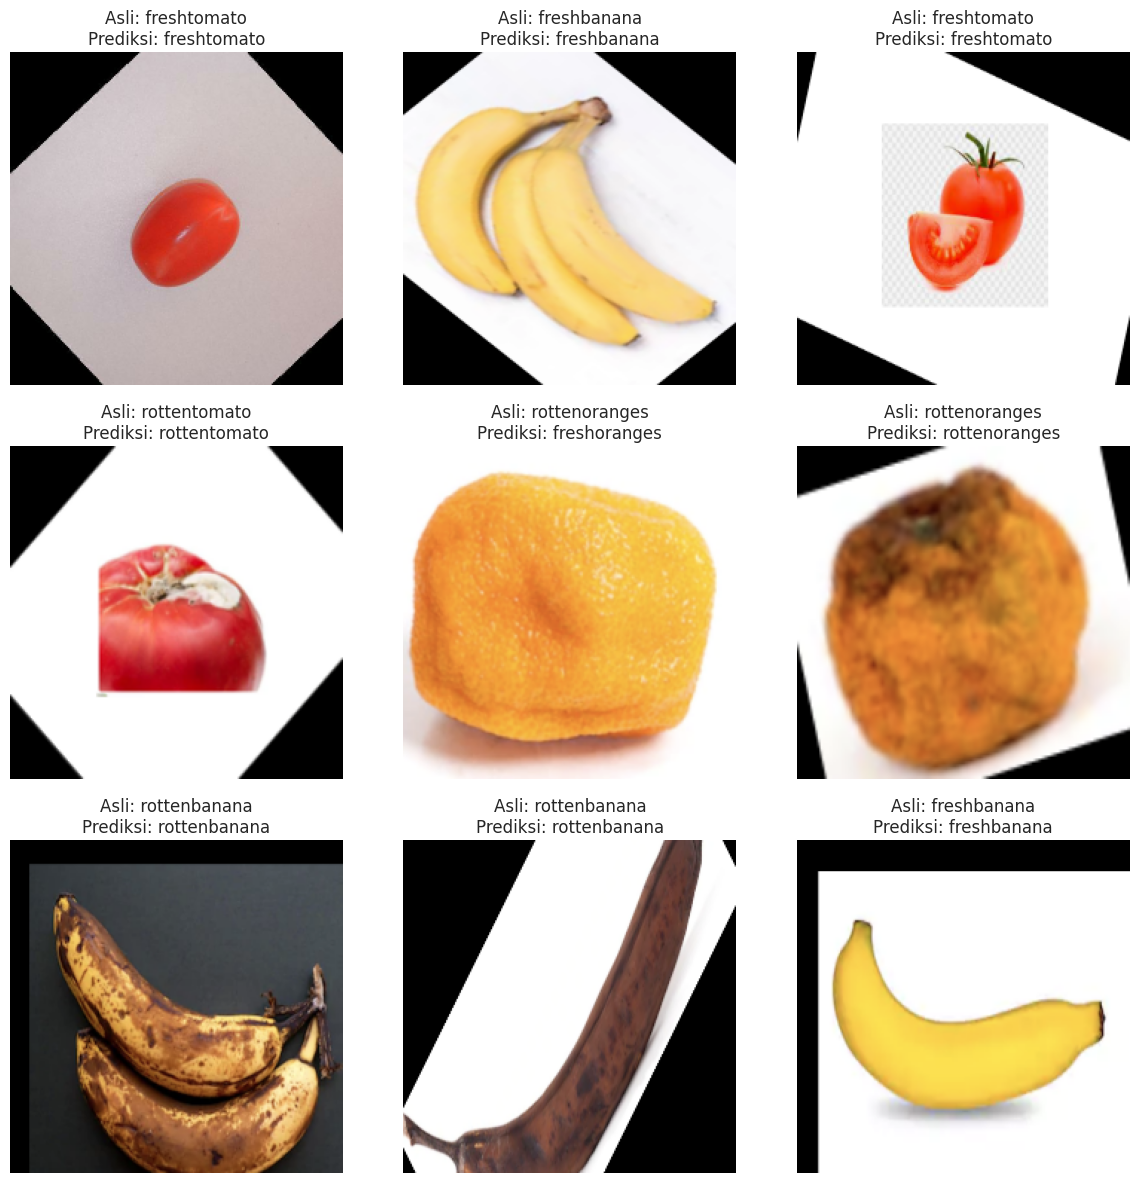

In [ ]:
import matplotlib.pyplot as plt

# Ambil beberapa batch dari test_dataset
for images, labels in test_dataset.take(1):  # ambil 1 batch
    y_pred = model.predict(images)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):  # tampilkan 9 gambar pertama
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names2[labels[i].numpy()]
        pred_label = class_names2[y_pred_classes[i]]
        plt.title(f"Asli: {true_label}\nPrediksi: {pred_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

## **Evaluasi Model**

### Evaluasi dan testing model

In [ ]:
from tensorflow.keras.models import load_model
# Load model dari file .h5
model = load_model("model_cnn.h5")

In [ ]:
import pickle

with open('cnn_history.pkl', 'rb') as f:
    history = pickle.load(f)

In [ ]:
# Check test set accuracy of model 5 since base model will be changed afterwards
# Inisialisasi dictionary untuk menyimpan skor
test_scores = {}
train_scores = {}

# Evaluasi model pada data training dan testing
train_accuracy = model.evaluate(train_dataset, verbose=0)[1]
test_accuracy = model.evaluate(test_dataset, verbose=0)[1]

# Simpan hasil ke dictionary dengan label yang sesuai
train_scores["Model"] = train_accuracy
test_scores["Model"] = test_accuracy

# Tampilkan hasil
print(f"Akurasi Model pada data training: {train_accuracy:.2f}")
print(f"Akurasi Model pada data testing: {test_accuracy:.2f}")

Akurasi Model pada data training: 0.93
Akurasi Model pada data testing: 0.92


#### Akurasi dan Loss

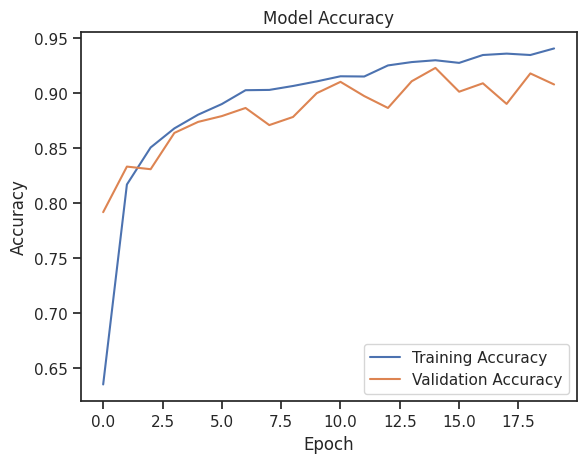

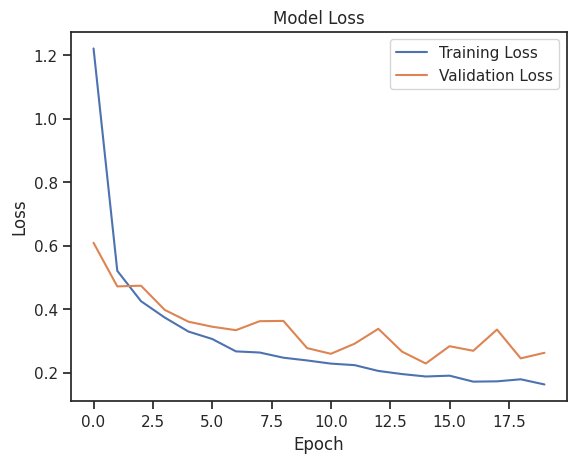

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Confusion Matrix

148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step


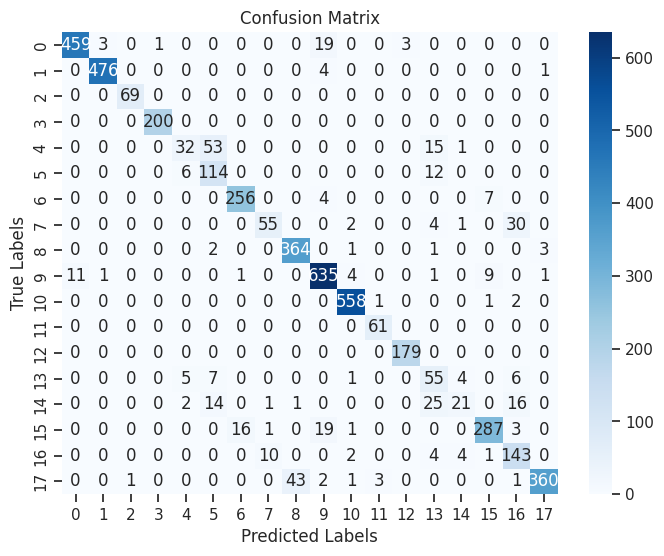


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       485
           1       0.99      0.99      0.99       481
           2       0.99      1.00      0.99        69
           3       1.00      1.00      1.00       200
           4       0.71      0.32      0.44       101
           5       0.60      0.86      0.71       132
           6       0.94      0.96      0.95       267
           7       0.82      0.60      0.69        92
           8       0.89      0.98      0.93       371
           9       0.93      0.96      0.94       663
          10       0.98      0.99      0.99       562
          11       0.94      1.00      0.97        61
          12       0.98      1.00      0.99       179
          13       0.47      0.71      0.56        78
          14       0.68      0.26      0.38        80
          15       0.94      0.88      0.91       327
          16       0.71      0.87      0.78       164
   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Prediksi data test
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)  # ambil kelas dengan skor tertinggi

# 2. Ambil label asli dari test_dataset
# Jika test_dataset dibuat dari tf.data, kamu bisa ambil semua label seperti ini:
y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy())  # tanpa argmax karena bukan one-hot
y_true = np.array(y_true)

# 3. Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# (Opsional) Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

## **Test Model Dengan Data Testing**

Saving pisang_fresh.webp to pisang_fresh (1).webp
Saving Screen Shot 2018-06-12 at 8.48.18 PM.png to Screen Shot 2018-06-12 at 8.48.18 PM (3).png


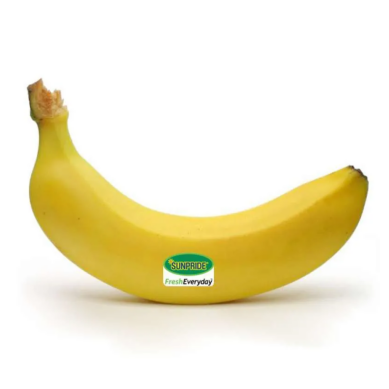

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediksi untuk pisang_fresh (1).webp: freshbanana


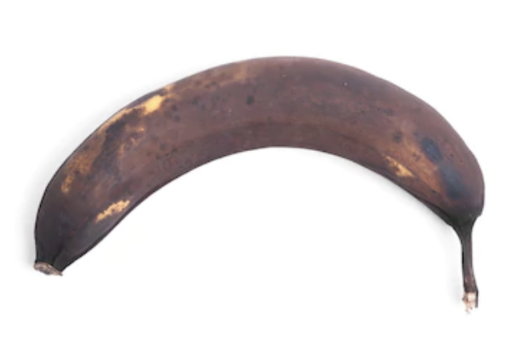

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediksi untuk Screen Shot 2018-06-12 at 8.48.18 PM (3).png: rottenbanana

Hasil prediksi semua gambar yang di-upload:
pisang_fresh (1).webp: freshbanana
Screen Shot 2018-06-12 at 8.48.18 PM (3).png: rottenbanana


In [3]:
# Install TensorFlow jika belum terpasang
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Daftar nama kelas (fresh dan rotten)
class_names = [
    'freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber',
    'freshokra', 'freshoranges', 'freshpotato', 'freshtomato',
    'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber',
    'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato'
]

# Muat model
model = load_model('model_cnn.h5')

# Tentukan ukuran gambar
IMG_HEIGHT = 224
IMG_WIDTH = 224

# List untuk menyimpan hasil prediksi sebelumnya
predictions = []

# Fungsi untuk memproses dan memprediksi gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Mengambil kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class

# Upload gambar untuk diuji (khusus untuk Google Colab)
from google.colab import files
uploaded = files.upload()

# Gambar yang di-upload dan prediksi baru
for file_name in uploaded.keys():
    img_path = '/content/' + file_name
    # Tampilkan gambar
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prediksi gambar
    predicted_class = predict_image(img_path)

    # Menambahkan prediksi ke list
    predictions.append((file_name, class_names[predicted_class[0]]))

    # Tampilkan prediksi yang telah dilakukan
    print(f"Prediksi untuk {file_name}: {class_names[predicted_class[0]]}")

# Tampilkan semua prediksi yang telah dilakukan
print("\nHasil prediksi semua gambar yang di-upload:")
for img_name, pred_class in predictions:
    print(f"{img_name}: {pred_class}")